#### Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('Wine.csv')
dataFrame

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [4]:
# Tried to see if other parameters influence to target parameter
grouped = dataFrame.groupby('Customer_Segment')
sum_by_segment = grouped['Customer_Segment'].sum()
print(sum_by_segment)
display(dataFrame.columns)

cleared_dataFrame = dataFrame[['Ash_Alcanity', 'Total_Phenols', 'Flavanoids', 'Hue', 'OD280', 'Proline']]

Customer_Segment
1     59
2    142
3    144
Name: Customer_Segment, dtype: int64


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

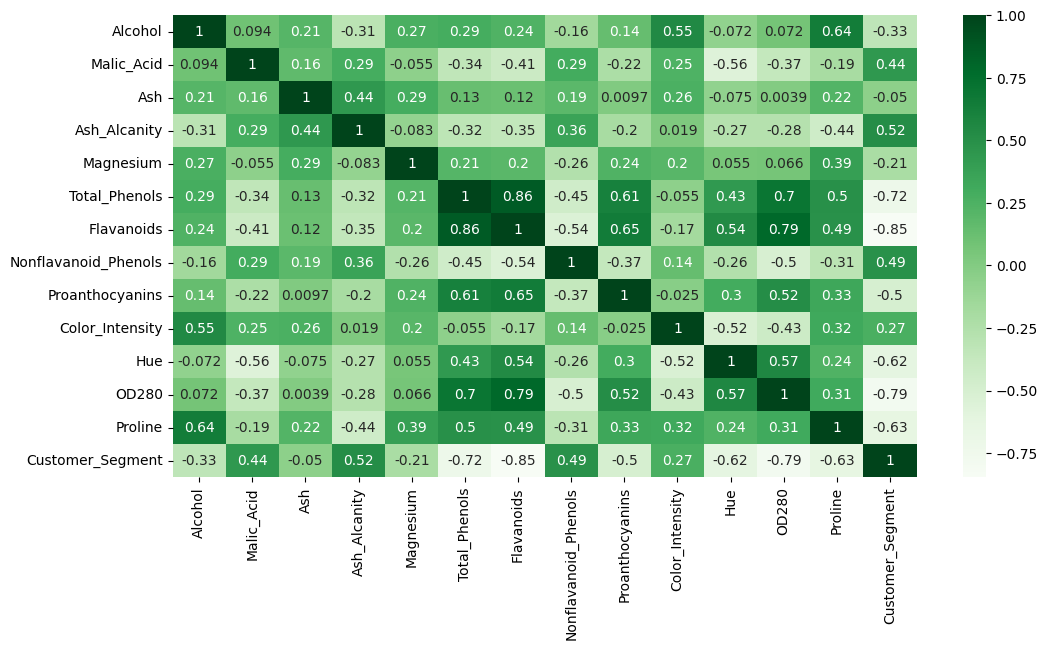

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataFrame.corr(), annot=True, cmap='Greens')
plt.show()

#### Find the best number of clusters for GMM

In [6]:
# Convert categorical columns into numeric form using dummy variables
data_numeric = pd.get_dummies(dataFrame)

# Tried to scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

In [7]:
def find_optimal_clusters_GaussianMixture(model, data):
    silhouette_scores = []
    for n_clusters in range(2, 11):
        model.set_params(n_components=n_clusters)
        labels = model.fit_predict(data)
        
        # Compute silhouette score
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
        print(f"For {n_clusters} clusters, silhouette score: {score}")
        
    optimal_clusters_index = silhouette_scores.index(max(silhouette_scores))
    optimal_clusters = optimal_clusters_index + 2
    return optimal_clusters

In [8]:
def find_optimal_clusters_KMeans(model, data):
    silhouette_scores = []
    for n_clusters in range(2, 11):
        model.set_params(n_clusters=n_clusters)
        labels = model.fit_predict(data)
        
        # Compute silhouette score
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
        print(f"For {n_clusters} clusters, silhouette score: {score}")
        
    optimal_clusters_index = silhouette_scores.index(max(silhouette_scores))
    optimal_clusters = optimal_clusters_index + 2
    return optimal_clusters

In [9]:
# Determine optimal number of clusters for GMM
gmm = GaussianMixture()
optimal_clusters_gmm = find_optimal_clusters_GaussianMixture(gmm, cleared_dataFrame)
print("Optimal number of clusters for GMM:", optimal_clusters_gmm)

For 2 clusters, silhouette score: 0.5026261403691517
For 3 clusters, silhouette score: 0.19769444084613752
For 4 clusters, silhouette score: 0.06888735468882748
For 5 clusters, silhouette score: 0.20569570495566564
For 6 clusters, silhouette score: 0.297623296538818
For 7 clusters, silhouette score: 0.43649615977344136
For 8 clusters, silhouette score: 0.3276745416238493
For 9 clusters, silhouette score: 0.4035677023134505
For 10 clusters, silhouette score: 0.330691164887791
Optimal number of clusters for GMM: 2


In [10]:
# Determine optimal number of clusters for KMeans
kmeans = KMeans()
optimal_clusters_kmeans = find_optimal_clusters_KMeans(kmeans, dataFrame)
print("Optimal number of clusters for KMeans:", optimal_clusters_kmeans)

c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kme

For 2 clusters, silhouette score: 0.6568490946514269
For 3 clusters, silhouette score: 0.5711220218931753
For 4 clusters, silhouette score: 0.562013637082329
For 5 clusters, silhouette score: 0.548969124044004
For 6 clusters, silhouette score: 0.5656105961617423
For 7 clusters, silhouette score: 0.5621273004049295
For 8 clusters, silhouette score: 0.5406178977066922
For 9 clusters, silhouette score: 0.5244502300376042
For 10 clusters, silhouette score: 0.5202558024985647
Optimal number of clusters for KMeans: 2


c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Plotting Silhouette scores for GMM
gmm_scores = []
for n_clusters in range(2, 11):
    gmm.n_components = n_clusters
    labels = gmm.fit_predict(dataFrame)
    silhouette_avg = silhouette_score(dataFrame, labels)
    gmm_scores.append(silhouette_avg)

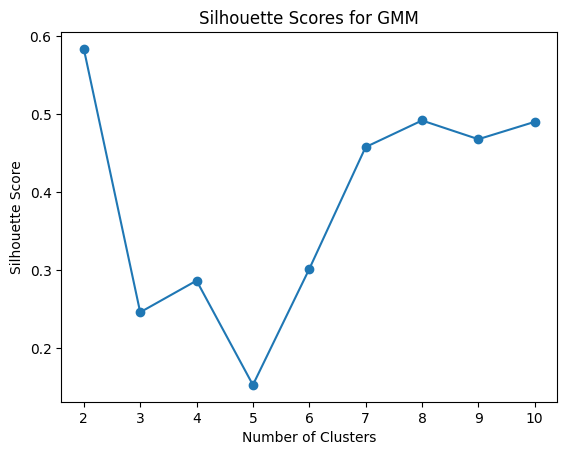

In [12]:
plt.plot(range(2, 11), gmm_scores, marker='o')
plt.title('Silhouette Scores for GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
# Plotting Silhouette scores for KMeans
kmeans_scores = []
for n_clusters in range(2, 11):
    kmeans.n_clusters = n_clusters
    labels = kmeans.fit_predict(dataFrame)
    silhouette_avg = silhouette_score(dataFrame, labels)
    kmeans_scores.append(silhouette_avg)

c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kme

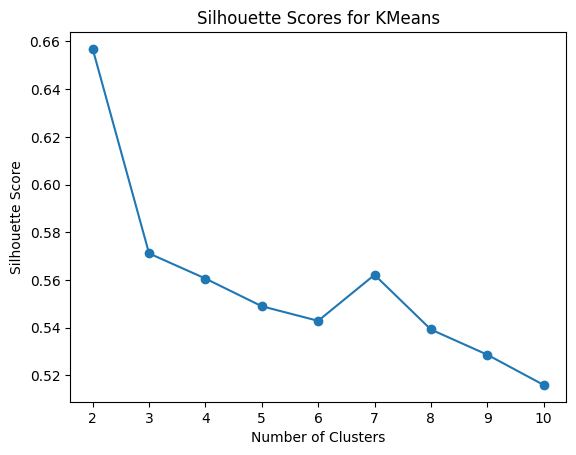

In [14]:
plt.plot(range(2, 11), kmeans_scores, marker='o')
plt.title('Silhouette Scores for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [15]:
# Cluster the dataset using both algorithms
gmm = GaussianMixture(n_components=optimal_clusters_gmm)
gmm_labels = gmm.fit_predict(dataFrame)

kmeans = KMeans(n_clusters=optimal_clusters_kmeans)
kmeans_labels = kmeans.fit_predict(dataFrame)

# Extract centroids from KMeans
kmeans_centroids = kmeans.cluster_centers_

# Extract means of clusters from GMM
gmm_means = gmm.means_

# Build table with means of clusters for both algorithms
columns = dataFrame.columns
kmeans_table = pd.DataFrame(kmeans_centroids, columns=columns)
gmm_table = pd.DataFrame(gmm_means, columns=columns)
display(gmm_table)
display(kmeans_table)



gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(dataFrame)

kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(dataFrame)

# Extract centroids from KMeans
kmeans_centroids = kmeans.cluster_centers_

# Extract means of clusters from GMM
gmm_means = gmm.means_

# Build table with means of clusters for both algorithms
columns = dataFrame.columns
kmeans_table = pd.DataFrame(kmeans_centroids, columns=columns)
gmm_table = pd.DataFrame(gmm_means, columns=columns)
display(gmm_table)
display(kmeans_table)

c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,12.636261,2.538000,2.329217,20.733042,94.713052,2.012261,1.538783,0.402435,1.396696,4.886695,0.895270,2.322261,554.173953,2.417391
1,13.665715,1.968254,2.434603,17.234922,108.920625,2.811429,2.924604,0.287778,1.945397,5.370953,1.070952,3.140000,1098.682670,1.063492


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,12.702846,2.544553,2.339106,20.408130,96.813008,2.062114,1.641463,0.392683,1.454065,4.851382,0.908618,2.408211,565.869919,2.308943
1,13.666545,1.870727,2.427818,17.452727,106.290909,2.816182,2.896545,0.292909,1.896909,5.520364,1.066655,3.066727,1151.727273,1.109091


c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,13.757863,1.759420,2.454416,16.983278,105.969424,2.852315,3.012709,0.293011,1.920320,5.653356,1.080363,3.141025,1153.757990,1.000000
1,12.611825,2.434426,2.323412,20.695361,93.711430,2.034414,1.628183,0.395072,1.427379,4.721755,0.916226,2.381172,526.041066,2.373285
2,13.043183,3.118469,2.363132,19.720266,111.736598,2.222064,1.657647,0.366732,1.586331,5.217787,0.874391,2.471793,818.912068,2.077121


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,2.258065
1,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884,2.275362
2,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936,1.021277


Модели определили что лучше всего стоило бы использовать 2 кластера хотя в самом датасете их 3.

Основываясь на полученных кластерах можно заметить что лучше всего определяются люди относящиеся к 1 кластеру так как их центроиды находятся в единице.
Хуже модели справляются со 2 и 3 кластером возможно из-за малого количества данных.

Если разделить на 3 кластера то лучше справляется GMM модель так как более раздельно определят эти три кластера так как их центроиды более отдалены друг от друга чем в модели KMeans 